# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Importing Dataset

In [2]:
Titanic_data = pd.read_csv('tested.csv')
Titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
# To know number of columns and rows
Titanic_data.shape


(418, 12)

In [4]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
Titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
Titanic_data.drop(columns=["Cabin"],inplace=True)

In [7]:
#imputing Missing values for age
Titanic_data['Age'].fillna(Titanic_data['Age'].mean(), inplace=True)


In [8]:
#Fare having 1 missing value,so replace with mean value
Titanic_data['Fare'].fillna(Titanic_data['Fare'].mean(), inplace=True)

In [9]:
Titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
Titanic_data['Survived']=Titanic_data['Survived'].astype('category')
Titanic_data['Pclass']=Titanic_data['Pclass'].astype('category')
Titanic_data['Sex']=Titanic_data['Sex'].astype('category')
Titanic_data['Age']=Titanic_data['Age'].astype('int')
Titanic_data['Embarked']=Titanic_data['Embarked'].astype('category')

In [11]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Survived     418 non-null    category
 2   Pclass       418 non-null    category
 3   Name         418 non-null    object  
 4   Sex          418 non-null    category
 5   Age          418 non-null    int32   
 6   SibSp        418 non-null    int64   
 7   Parch        418 non-null    int64   
 8   Ticket       418 non-null    object  
 9   Fare         418 non-null    float64 
 10  Embarked     418 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 23.5+ KB


In [12]:
Titanic_data.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,30.191388,0.447368,0.392344,35.627188
std,120.810458,12.654104,0.896760,0.981429,55.840500
min,892.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,30.000000,0.000000,0.000000,14.454200
75%,1204.750000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,76.000000,8.000000,9.000000,512.329200


# Data Visualization

0    0.636364
1    0.363636
Name: Survived, dtype: float64


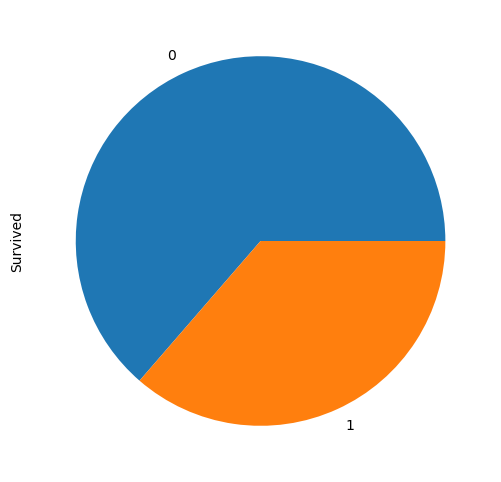

In [13]:
Titanic_data.Survived.value_counts().plot(kind='pie',figsize=(8,6))
print(Titanic_data.Survived.value_counts(normalize=True))

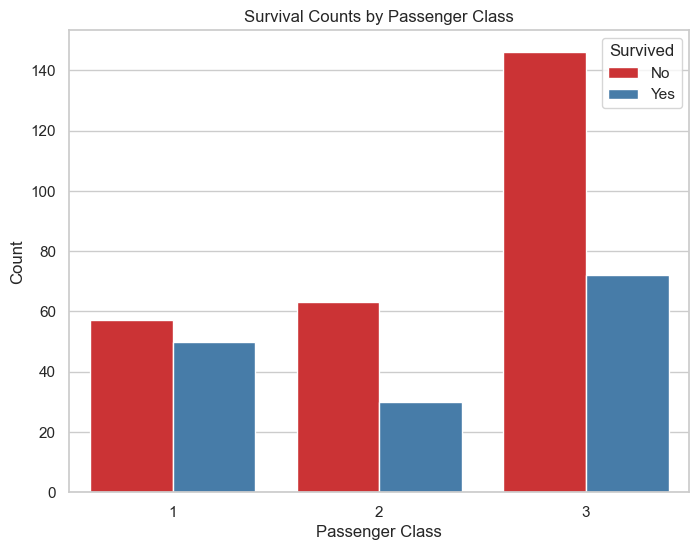

In [14]:
# Create a bar chart showing survival counts by passenger class
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=Titanic_data, palette='Set1')
plt.title("Survival Counts by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

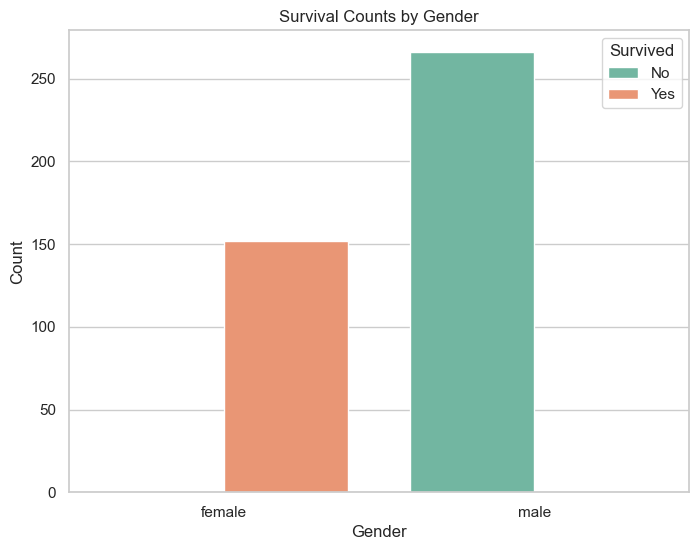

In [15]:
# Create a bar chart showing survival counts by gender
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=Titanic_data, palette='Set2')
plt.title("Survival Counts by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

S    64.593301
C    24.401914
Q    11.004785
Name: Embarked, dtype: float64


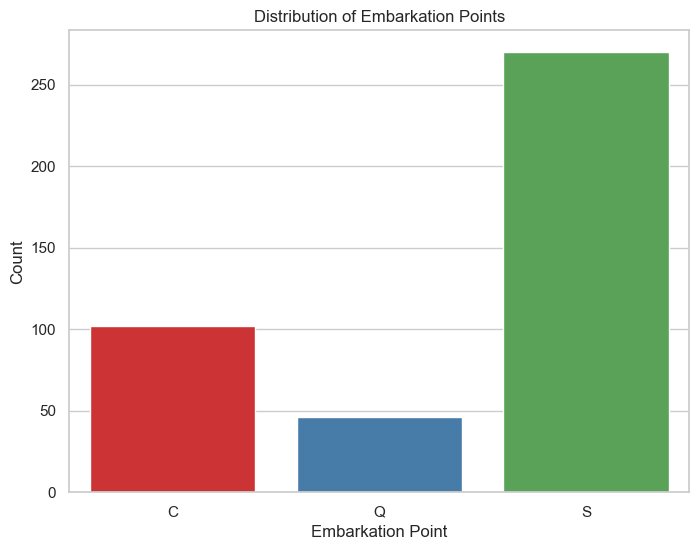

In [16]:
print((Titanic_data['Embarked'].value_counts()/418)*100)

plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=Titanic_data, palette='Set1')
plt.title("Distribution of Embarkation Points")
plt.xlabel("Embarkation Point")
plt.ylabel("Count")
plt.show()

0.516080054627597
0.9003780571212805


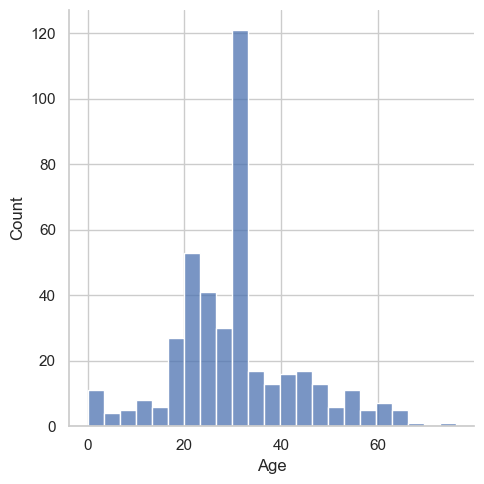

In [17]:
#age displot

sns.displot(Titanic_data['Age'])
print(Titanic_data['Age'].skew())
print(Titanic_data['Age'].kurt())


<Axes: >

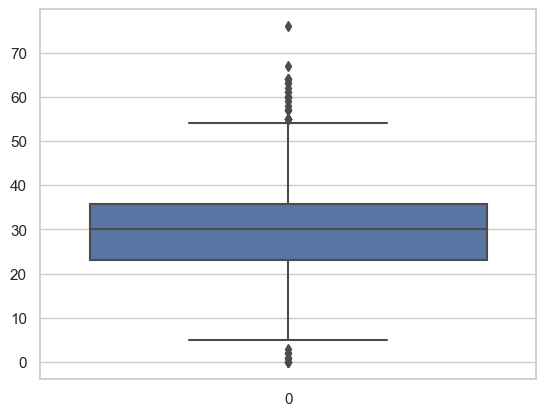

In [18]:
sns.boxplot(Titanic_data['Age'])

3.6915998329393105
17.971266196944526


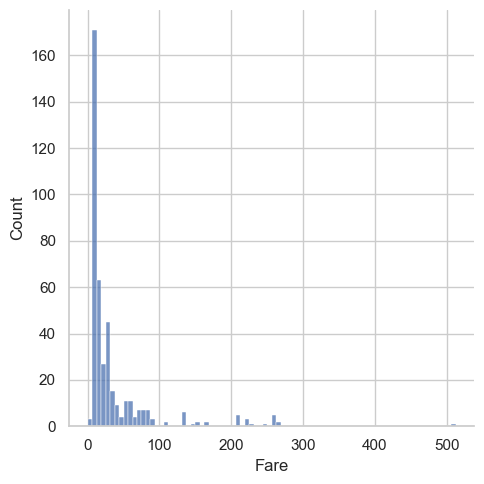

In [19]:
#Fare column
sns.displot(Titanic_data['Fare'])
print(Titanic_data['Fare'].skew())
print(Titanic_data['Fare'].kurt())



<Axes: >

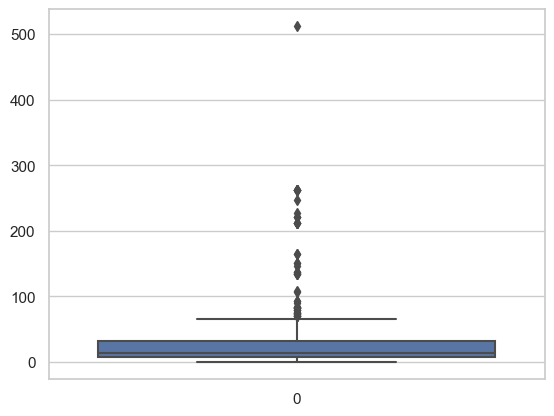

In [20]:
sns.boxplot(Titanic_data['Fare'])

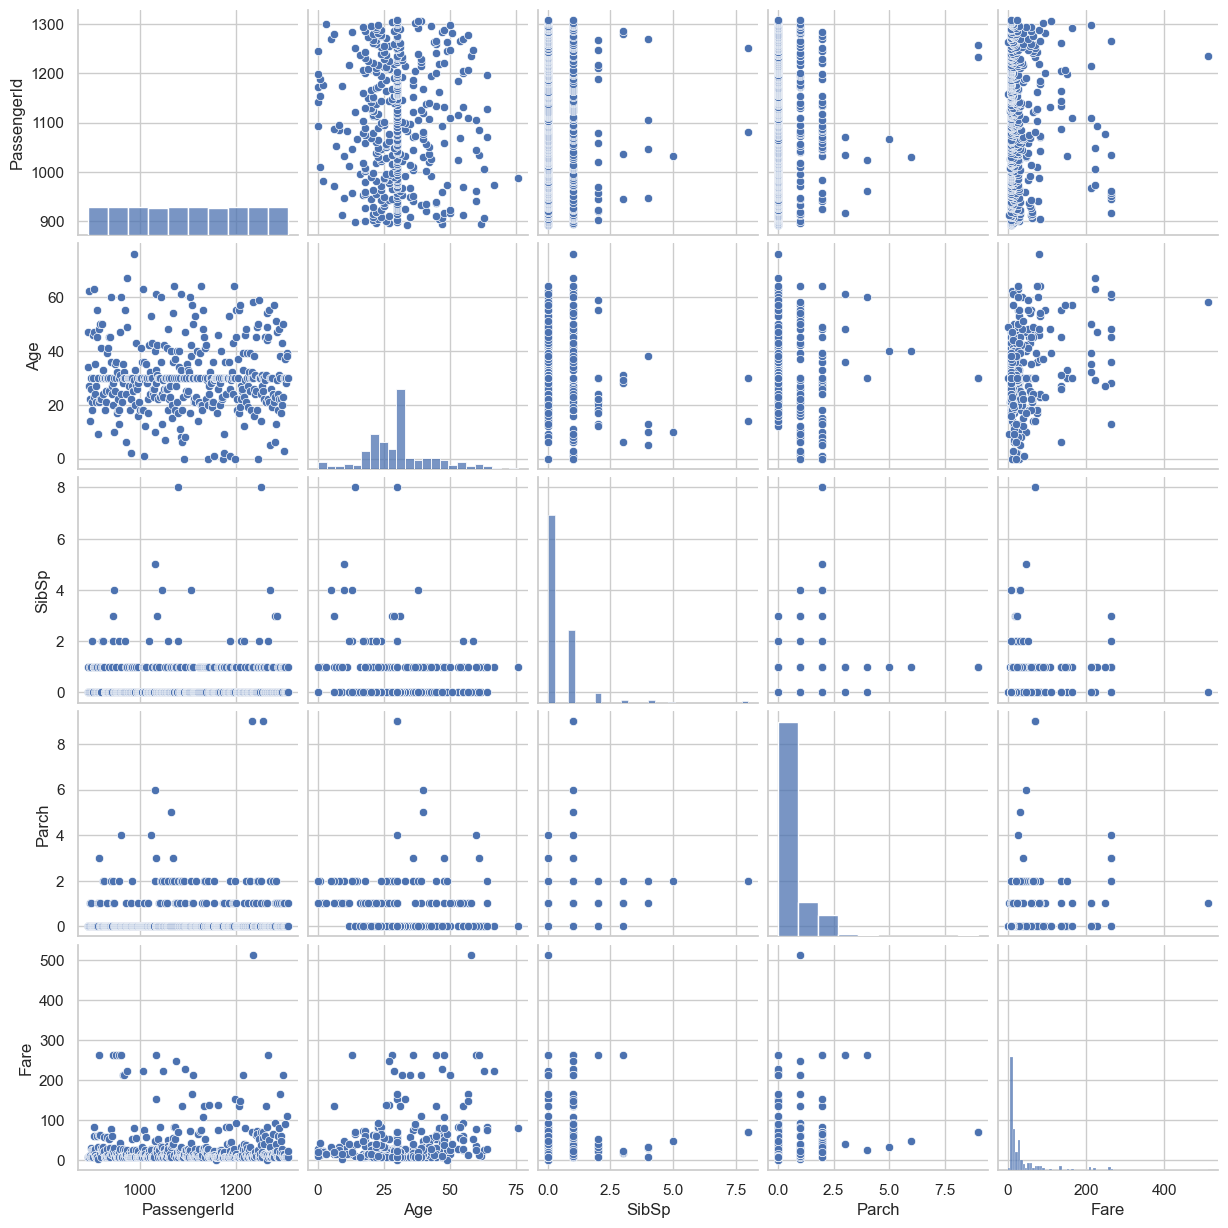

In [21]:
sns.pairplot(Titanic_data)

C:\Users\Sonal Lokhande\AppData\Local\Temp\ipykernel_8088\1696088151.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Titanic_data.corr())


<Axes: >

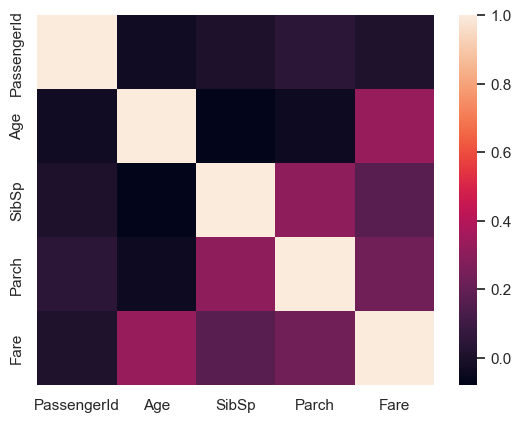

In [22]:
sns.heatmap(Titanic_data.corr())

# Feature engineering 

In [23]:
#Creating new column by adding parch and sibsb
Titanic_data['Family_size'] = Titanic_data['Parch'] + Titanic_data['SibSp']

In [24]:
Titanic_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
179,1071,1,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64,0,2,PC 17756,83.1583,C,2
144,1036,0,1,"Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lin...",male,42,0,0,17475,26.5500,S,0
248,1140,1,2,"Hold, Mrs. Stephen (Annie Margaret Hill)",female,29,1,0,26707,26.0000,S,1
393,1285,0,2,"Gilbert, Mr. William",male,47,0,0,C.A. 30769,10.5000,S,0
186,1078,1,2,"Phillips, Miss. Alice Frances Louisa",female,21,0,1,S.O./P.P. 2,21.0000,S,1


In [25]:
def Family_type(num):
    if num == 0:
        return 'Alone'
    elif num>0 and num<=4:
        return 'Medium'
    else:
        return 'Large'

In [26]:
Titanic_data['Family_type']=Titanic_data['Family_size'].apply(Family_type)

In [27]:
Titanic_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Family_type
155,1047,0,3,"Duquemin, Mr. Joseph",male,24,0,0,S.O./P.P. 752,7.55,S,0,Alone
327,1219,0,1,"Rosenshine, Mr. George (Mr George Thorne"")""",male,46,0,0,PC 17585,79.20,C,0,Alone
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37,1,0,19928,90.00,Q,1,Medium
406,1298,0,2,"Ware, Mr. William Jeffery",male,23,1,0,28666,10.50,S,1,Medium
290,1182,0,1,"Rheims, Mr. George Alexander Lucien",male,30,0,0,PC 17607,39.60,S,0,Alone


In [28]:
#dropping columns = Sibsp,parch ,Family_size

Titanic_data.drop(columns=['SibSp','Parch','Family_size'],inplace = True)

In [29]:
Titanic_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_type
348,1240,0,2,"Giles, Mr. Ralph",male,24,248726,13.5000,S,Alone
360,1252,0,3,"Sage, Master. William Henry",male,14,CA. 2343,69.5500,S,Large
98,990,1,3,"Braf, Miss. Elin Ester Maria",female,20,347471,7.8542,S,Alone
185,1077,0,2,"Maybery, Mr. Frank Hubert",male,40,239059,16.0000,S,Alone
127,1019,1,3,"McCoy, Miss. Alicia",female,30,367226,23.2500,Q,Medium


In [30]:
pd.crosstab(Titanic_data['Family_type'],Titanic_data['Survived']).apply(lambda r:round((r/r.sum())*100,1),axis=1)

Survived,0,1
Family_type,,
Alone,73.1,26.9
Large,53.8,46.2
Medium,48.7,51.3


# Detecting Outliers

In [31]:
#handling outlires from age column

Titanic_data =Titanic_data[Titanic_data['Age']<(Titanic_data['Age'].mean() + 3 * Titanic_data['Age'].std())]
Titanic_data.shape

(417, 10)

In [32]:
#Handling outliers from fare column
Q1 = np.percentile(Titanic_data['Fare'],25)
Q3 = np.percentile(Titanic_data['Fare'],75)

outlier_low=Q1 -1.5 *(Q3-Q1)
outlier_high=Q3 + 1.5 *(Q3-Q1)

Titanic_data=Titanic_data[(Titanic_data['Fare']>outlier_low) & (Titanic_data['Fare']<outlier_high)]

One Hot encoding 

In [33]:
X_encoded = pd.get_dummies(data=Titanic_data, columns=['Pclass', 'Sex', 'Embarked', 'Family_type'], drop_first=True)

In [34]:
# Select features and target variable from the one-hot encoded DataFrame
X = X_encoded[['Age', 'Pclass_2', 'Pclass_3', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Family_type_Large', 'Family_type_Medium']]
y = Titanic_data['Survived']

Data Splitting

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Selection and Training 

In [37]:
# Model Selection and Training 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Model Evaluation

In [38]:
# Model Evaluation
y_pred = model.predict(X_test)

Calculate accuracy

In [39]:
# Calculate accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [40]:
# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        32

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



In [41]:
# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[41  0]
 [ 0 32]]
